In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline

In [43]:
cars=pd.read_csv("Cars93.csv")

In [44]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [45]:
cars.describe()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
Unnamed: 0            93 non-null int64
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64


In [47]:
cars.isna().sum() 

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [48]:
cars["Luggage.room"].value_counts()

14.0    18
15.0    10
13.0     9
12.0     8
11.0     8
16.0     6
17.0     5
10.0     4
18.0     4
9.0      2
8.0      2
21.0     2
6.0      1
22.0     1
19.0     1
20.0     1
Name: Luggage.room, dtype: int64

## Replacing the null values using mean values

In [49]:
cars["Luggage.room"].fillna(cars["Luggage.room"].mean(),inplace=True)

In [50]:
cars.isna().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        2
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [51]:
cars["Rear.seat.room"].fillna(cars["Rear.seat.room"].mean(),inplace=True)

In [52]:
cars.isna().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

## checking for outliers using boxplot 

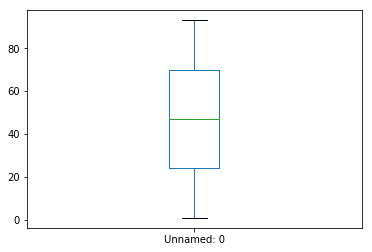

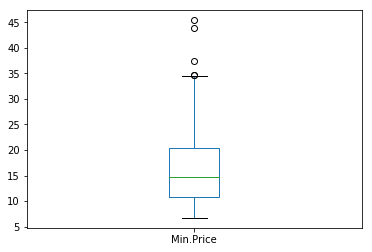

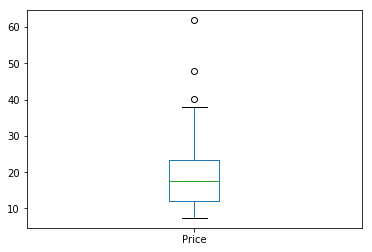

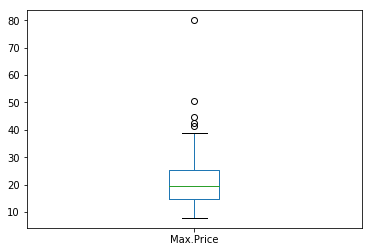

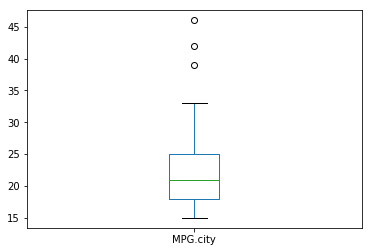

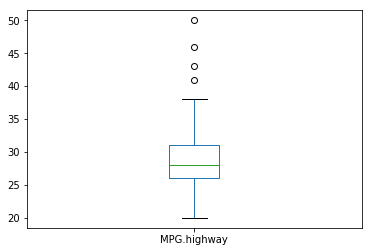

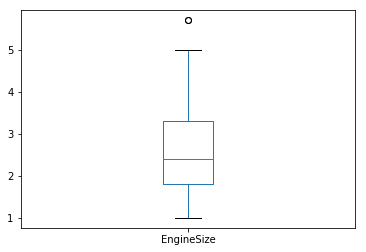

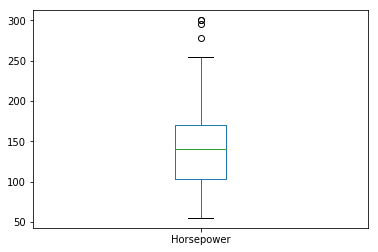

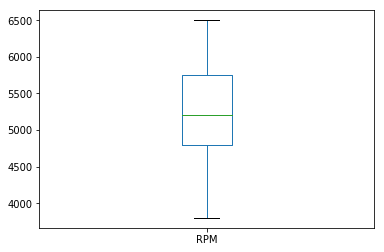

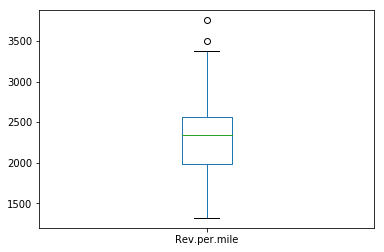

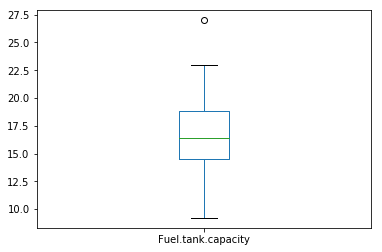

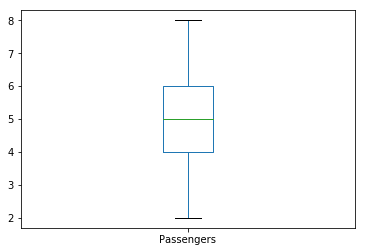

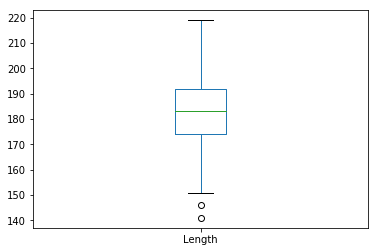

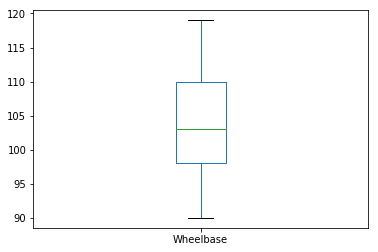

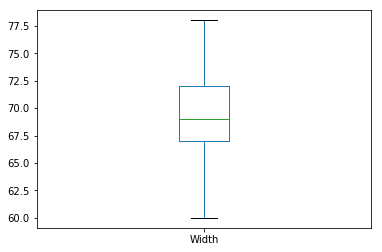

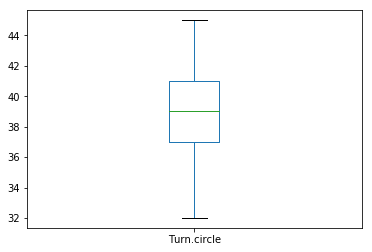

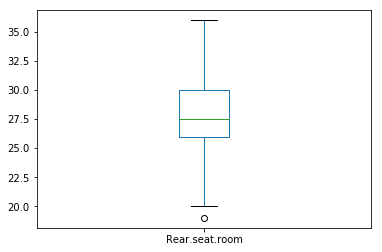

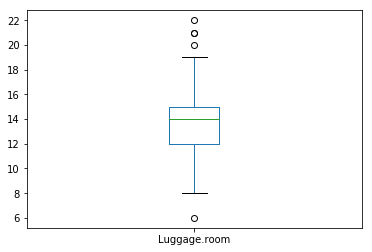

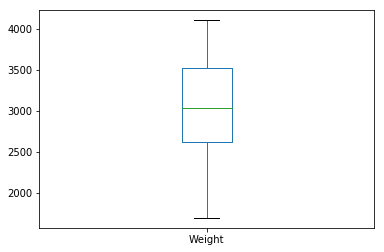

In [53]:
for i in cars.columns:
    if (i!="Manufacturer" and i!="Model" and i!="Type" and i!="AirBags" and i!="DriveTrain" and i!="Cylinders" and i!="Man.trans.avail" and i!="Origin" and i!="Make"):
        cars[i].plot(kind="box")
        plt.show()

In [54]:
# there are some outliers in min price ,price,horsepower,maxprice,mpg city and rev per mile but i am not going to 
# remove the outliers because these values can change for each and every cars 

In [55]:
# i am going to take type as target variable and i am goin to remove all the other features which are not needed for prediction

In [56]:
cars["Type"].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [57]:
cars["Cylinders"].value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [58]:
cars.drop(["Manufacturer","Model","AirBags","DriveTrain","Cylinders","Man.trans.avail","Origin","Make"],axis=1,inplace=True)

In [59]:
cars.head()

,Unnamed: 0,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,Small,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,Midsize,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,Compact,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,4,Midsize,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,5,Midsize,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


## label encoding 

In [60]:
le=LabelEncoder()
cars["Type"]=le.fit_transform(cars["Type"])

In [61]:
cars.head()

,Unnamed: 0,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,3,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,0,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,4,2,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,5,2,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


In [62]:
cars["Type"].value_counts()

2    22
3    21
0    16
4    14
1    11
5     9
Name: Type, dtype: int64

In [63]:
#Midsize->2  small-> 3 compact->0 sporty -> 4 large->1  van->5

In [64]:
Type=cars["Type"]
Type.head()

0    3
1    2
2    0
3    2
4    2
Name: Type, dtype: int32

In [65]:
cars.drop(["Type"],axis=1,inplace=True)
cars.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,4,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,5,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


In [66]:
scaler=MinMaxScaler()
norm_cars=pd.DataFrame(scaler.fit_transform(cars))

In [67]:
norm_cars.columns=["Unnamed","Min.Price","Price","Max.Price","MPG.city","MPG.highway","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity","Passengers","Length","Wheelbase","Width","Turn.circle","Rear.seat.room","Luggage.room","Weight"]
norm_cars.head()

,Unnamed,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,0.000000,0.160207,0.155963,0.151179,0.322581,0.366667,0.170213,0.346939,0.925926,0.644764,0.224719,0.500000,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087
1,0.010870,0.581395,0.486239,0.427184,0.096774,0.166667,0.468085,0.591837,0.629630,0.416838,0.494382,0.500000,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859
2,0.021739,0.496124,0.398165,0.338419,0.161290,0.200000,0.382979,0.477551,0.629630,0.394251,0.432584,0.500000,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095
3,0.032609,0.622739,0.555963,0.509015,0.129032,0.200000,0.382979,0.477551,0.629630,0.498973,0.668539,0.666667,0.666667,0.551724,0.555556,0.384615,0.705882,0.6875,0.709544
4,0.043478,0.439276,0.414679,0.392510,0.225806,0.333333,0.531915,0.624490,0.703704,0.503080,0.668539,0.333333,0.576923,0.655172,0.500000,0.538462,0.470588,0.4375,0.807054


In [68]:
norm_cars["Type"]=Type
norm_cars.head(3)

,Unnamed,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type
0,0.000000,0.160207,0.155963,0.151179,0.322581,0.366667,0.170213,0.346939,0.925926,0.644764,0.224719,0.5,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087,3
1,0.010870,0.581395,0.486239,0.427184,0.096774,0.166667,0.468085,0.591837,0.629630,0.416838,0.494382,0.5,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859,2
2,0.021739,0.496124,0.398165,0.338419,0.161290,0.200000,0.382979,0.477551,0.629630,0.394251,0.432584,0.5,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095,0


## Train test split

In [69]:
features=norm_cars.loc[:,["Unnamed","Min.Price","Price","Max.Price","MPG.city","MPG.highway","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity","Passengers","Length","Wheelbase","Width","Turn.circle","Rear.seat.room","Luggage.room","Weight"]]
dependent=norm_cars.loc[:,["Type"]]
cars_train,cars_test,label_train,label_test=train_test_split(features,dependent,test_size=0.30,random_state=0)
display(cars_train.shape)
display(cars_test.shape)

(65, 19)

(28, 19)

## PCA (feature selection methods)

In [70]:
pca=PCA(n_components=6)
cars_train=pca.fit_transform(cars_train)
cars_test=pca.transform(cars_test)


In [71]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.56194734, 0.12199868, 0.1048724 , 0.05210019, 0.04309441,
       0.02655341])

In [72]:
mod=LogisticRegression()
mod.fit(cars_train,label_train)


# predicting the test set results

y_pred=mod.predict(cars_test)
y_pred


array([2, 3, 5, 5, 4, 1, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2, 3, 0, 2, 0, 3,
       3, 1, 3, 3, 3, 1])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(label_test,y_pred)

0.5357142857142857

In [75]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[0, 0, 2, 3, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [2, 1, 3, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [0, 0, 1, 4, 1, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [76]:
print("train accuracy")
display(mod.score(cars_train,label_train))


print("test accuracy")
display(mod.score(cars_test,label_test))

train accuracy


0.6923076923076923

test accuracy


0.5357142857142857

In [78]:
train_prediction=mod.predict(cars_train)
test_prediction=mod.predict(cars_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [79]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2,3,4,5
0,1,0,2,8,0,0
1,0,5,3,0,0,0
2,1,0,14,1,0,0
3,0,0,0,15,0,0
4,0,0,1,4,3,0
5,0,0,0,0,0,7


In [80]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2,3,4,5
0,0,0,2,3,0,0
1,0,3,0,0,0,0
2,2,1,3,0,0,0
3,0,0,0,6,0,0
4,0,0,1,4,1,0
5,0,0,0,0,0,2


In [81]:
print(classification_report(label_train,train_prediction))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       1.00      0.62      0.77         8
           2       0.70      0.88      0.78        16
           3       0.54      1.00      0.70        15
           4       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         7

   micro avg       0.69      0.69      0.69        65
   macro avg       0.79      0.66      0.66        65
weighted avg       0.73      0.69      0.65        65



In [82]:
print(classification_report(label_test,test_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86         3
           2       0.50      0.50      0.50         6
           3       0.46      1.00      0.63         6
           4       1.00      0.17      0.29         6
           5       1.00      1.00      1.00         2

   micro avg       0.54      0.54      0.54        28
   macro avg       0.62      0.61      0.55        28
weighted avg       0.57      0.54      0.47        28



In [83]:
# decision tree algorithm 

model=DecisionTreeClassifier()

model.fit(cars_train,label_train)
print("train accuracy")
display(model.score(cars_train,label_train))

print("test accuracy")
display(model.score(cars_test,label_test))


train accuracy


1.0

test accuracy


0.6071428571428571

In [85]:
y_pred=model.predict(cars_test)
y_pred

array([2, 3, 2, 5, 4, 1, 3, 4, 4, 0, 3, 5, 2, 2, 3, 4, 2, 3, 0, 2, 5, 2,
       5, 1, 3, 3, 3, 5])

In [86]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[1, 0, 2, 1, 0, 1],
       [0, 2, 0, 0, 0, 1],
       [1, 0, 3, 0, 0, 2],
       [0, 0, 0, 6, 0, 0],
       [0, 0, 1, 1, 4, 0],
       [0, 0, 1, 0, 0, 1]], dtype=int64)

In [87]:
# k nearest algorithm    


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")


kmodel.fit(cars_train,label_train)
print("train accuracy")
display(kmodel.score(cars_train,label_train))

print("test accuracy")
display(kmodel.score(cars_test,label_test))

train accuracy


0.8307692307692308

test accuracy


0.6071428571428571

In [89]:
y_pred=kmodel.predict(cars_test)
y_pred

array([2, 3, 5, 5, 0, 1, 3, 3, 0, 0, 3, 1, 4, 2, 3, 3, 2, 3, 0, 0, 2, 0,
       2, 1, 3, 3, 3, 1])

In [90]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[2, 0, 2, 1, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [2, 1, 3, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [2, 0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [92]:
# SVM 
smodel=SVC(kernel="rbf")
smodel.fit(cars_train,label_train)
print("train accuracy")
display(smodel.score(cars_train,label_train))

print("test accuracy")
display(smodel.score(cars_test,label_test))


train accuracy


0.6153846153846154

test accuracy


0.5357142857142857

In [94]:
y_pred=kmodel.predict(cars_test)
y_pred

array([2, 3, 5, 5, 0, 1, 3, 3, 0, 0, 3, 1, 4, 2, 3, 3, 2, 3, 0, 0, 2, 0,
       2, 1, 3, 3, 3, 1])

In [95]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[2, 0, 2, 1, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [2, 1, 3, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [2, 0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [96]:
## RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.1)
rmodel.fit(cars_train,label_train)
print("train accuracy")
display(rmodel.score(cars_train,label_train))

print("test accuracy")
display(rmodel.score(cars_test,label_test))

train accuracy


0.7230769230769231

test accuracy


0.5

In [97]:
from sklearn.ensemble import AdaBoostClassifier
amodel=AdaBoostClassifier(n_estimators=10)
amodel.fit(cars_train,label_train)
print("train accuracy")
display(amodel.score(cars_train,label_train))

print("test accuracy")
display(amodel.score(cars_test,label_test))

train accuracy


0.49230769230769234

test accuracy


0.39285714285714285

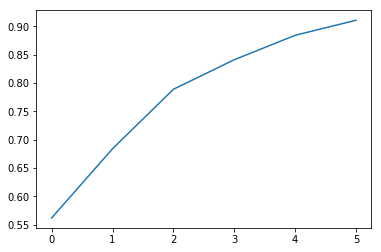

In [98]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [99]:
# decision tree algorithm using min_samples_split and min_impurity_level

model=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

model.fit(cars_train,label_train)
print("train accuracy")
display(model.score(cars_train,label_train))

print("test accuracy")
display(model.score(cars_test,label_test))


train accuracy


0.9384615384615385

test accuracy


0.5714285714285714

In [100]:
# decision tree algorithm using min_samples_split and min_impurity_level

model=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)

model.fit(cars_train,label_train)
print("train accuracy")
display(model.score(cars_train,label_train))

print("test accuracy")
display(model.score(cars_test,label_test))

train accuracy


0.7230769230769231

test accuracy


0.42857142857142855